In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/miguel_daal/Documents/Projects/Resonator_Analysis_Package/rap/rap/examples'

In [3]:
#Add rap package to search path 
import sys
sys.path.append('../..')

In [4]:
import rap

rap level init
rap.sweep level init


In [5]:
reload(rap.sweeps.sweep)
import rap.env_var
reload(rap.env_var)

<module 'rap.env_var' from '../../rap/env_var.pyc'>

In [6]:
swp = rap.sweep(database_location = './resonator_data/My_Data_Library.h5')

In [7]:
database_location =  './rap/examples/resonator_data/My_Data_Library.h5'
filename1 = './52a_survey.mat'
filename2 = './Coupling6_rescale2_full_23pH.s2p'
filename3 = './S5_truegapdistance.s2p'


In [8]:
swp.load_scandata(filename1)
swp.sweep_array_info()

Loading Run: 52a
There are 1 heater voltage(s), 1 input power(s), and 1 frequecy span(s)
Temperature readings found for scan(s). 50 readings per scan
001 - Total number of sweeps.
001 - Number of readout powers.
001 - Number of readout temperatures.
050 - Number of temperatures readings.
001 - Number of frequency bands.


S21 downsampled by factor n = 14.
cable delay is 9.76690965813e-08 seconds by minimum distance method


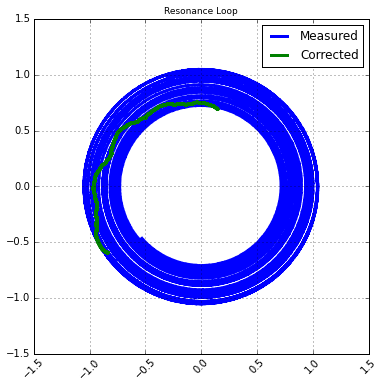

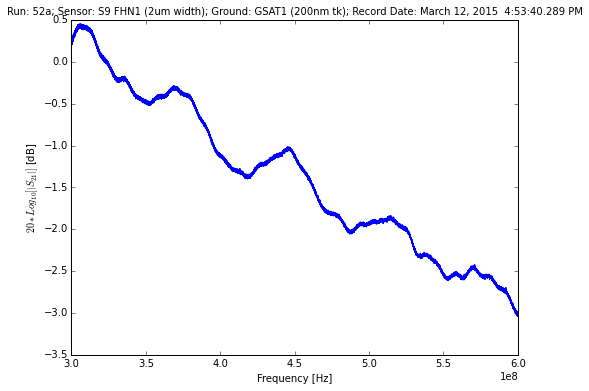

(<matplotlib.figure.Figure at 0x10e117250>,
 [<matplotlib.lines.Line2D at 0x10fba2990>])

In [9]:
swp.pick_loop(0)
swp.remove_cable_delay(Show_Plot = True, Verbose = True,Force_Recalculate = True)
swp.plot_transmission()

In [10]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /Run52a/T201503121653 exists. Aborting...


In [11]:
swp.load_touchstone(filename2, pick_loop=True)

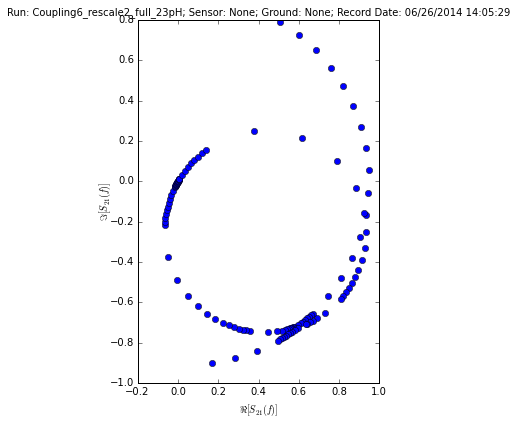

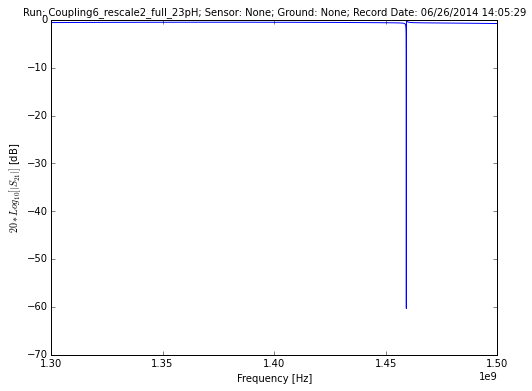

(<matplotlib.figure.Figure at 0x10e2e8b90>,
 [<matplotlib.lines.Line2D at 0x10fc5ccd0>])

In [12]:
swp.plot_loop(aspect = 'equal')
swp.plot_transmission()

Bandwidth cut:
	54 points outside of fr_est +/- 3*FWHM_est removed, 66 remaining data points


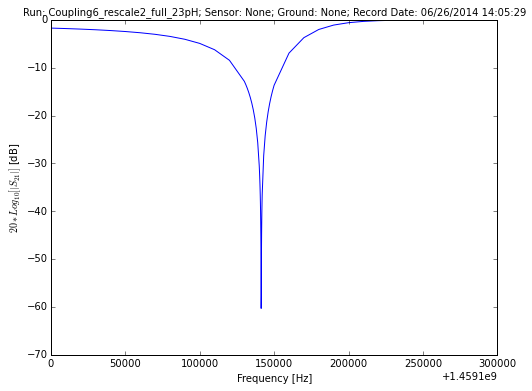

In [13]:
# lets trim this data so that we only have points that are 3*FWHM bandwidth away from each side of the
# transmission minimum. This will reduce the number of points we have to worry about...
swp.trim_loop(N=3, Verbose = True)
# see what was done
swp.plot_transmission(show = True);

In [14]:
## something to fix -- this loop must be trimmed for circle fit to fit is correctly
#swp.pick_loop(0)

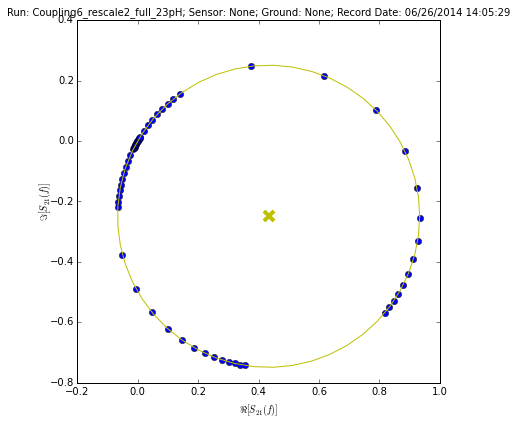

In [15]:
# next we fit the loop to a circle.
swp.circle_fit(Show_Plot = True)

Duplicates cuts:
	1 duplicate frequencies removed from loop data, 65 remaining data points
Radius cut:
	0 points < r_loop*0.75 or > r_loop*1.75 found and removed, 65 remaining data points
Bandwidth cut:
	0 points outside of fr_est +/- 8*FWHM_est removed, 65 remaining data points
Angle jump cut:
	0 points with discontinuous jumps in loop angle removed, 65 remaining data points
Initial Guess:
	Loop rotation 180.110758943 deg, fr 1459241300.0, Q 29184.826

Nelder-Mead Minimzation Result:
 final_simplex: (array([[ -1.02904873e+00,   2.54308290e+09,   3.57008280e+04],
       [ -1.02904873e+00,   2.54308290e+09,   3.57008280e+04],
       [ -1.02904873e+00,   2.54308290e+09,   3.57008280e+04],
       [ -1.02904873e+00,   2.54308290e+09,   3.57008280e+04]]), array([ 121.92365007,  121.92365007,  121.92365007,  121.92365007]))
           fun: 121.92365006584528
       message: 'Optimization terminated successfully.'
          nfev: 338
           nit: 137
        status: 0
       success: True


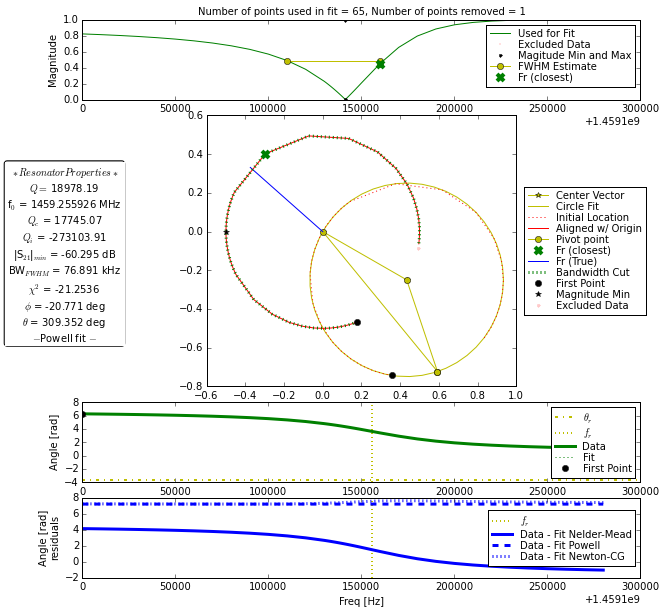

In [16]:
swp.phase_fit(Fit_Method = 'Multiple',Verbose = True, Show_Plot = True)

In [17]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /RunCoupling6_rescale2_full_23pH/T201406261405 exists. Aborting...


In [18]:
swp.load_touchstone(filename3, pick_loop=True)

In [19]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /RunS5_truegapdistance/T201406270542 exists. Aborting...


In [20]:
swp.construct_hf5_toc()

Column names are:
('Run', 'Time_Created', 'Num_Ranges', 'Num_Powers', 'Num_Temperature_Readings', 'Num_Temperature_Set_Points', 'Sensor', 'Ground_Plane', 'Path')
Rows, i.e. data, are:
[ ('52a', 'March 12, 2015  4:53:40.289 PM', 1, 1, 50, 1, 'S9 FHN1 (2um width)', 'GSAT1 (200nm tk)', '/Run52a/T201503121653')
 ('Coupling6_', '06/26/2014 14:05:29', 1, 1, 0, 1, '', '', '/RunCoupling6_rescale2_full_23pH/T201406261405')
 ('F1', '05/01/2015 12:00:00', 1, 10, 0, 1, '', '', '/RunF1/T201505011200')
 ('S5_truegap', '06/27/2014 05:42:39', 1, 1, 0, 1, '', '', '/RunS5_truegapdistance/T201406270542')]


Generating False Data...
 10 of 10 

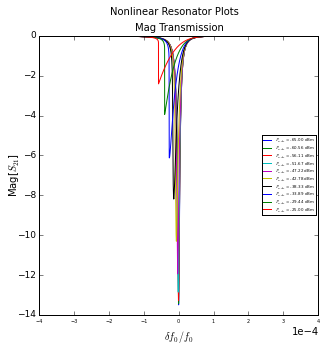

(<matplotlib.figure.Figure at 0x11028a9d0>,
 {1: <matplotlib.axes._subplots.AxesSubplot at 0x11029b090>})

In [21]:
swp.generate_nonlinear_data()

In [22]:
swp.save_hf5(overwrite = True)
swp.construct_hf5_toc()

Speficied h5 database exists and will be updated.
Table /RunF1/T201505011200 exists. Overwriting...
table metadata Resonator_Eeff not defined and is set to None
table metadata Test_Location not defined and is set to None
table metadata Atten_RTAmp_Input not defined and is set to None
table metadata Thermometer_Configuration not defined and is set to None
table metadata Fridge_Run_Start_Date not defined and is set to None
table metadata Minimum_Q not defined and is set to None
table metadata Atten_Added_At_NA not defined and is set to None
table metadata Thermometer_Voltage_Bias not defined and is set to None
table metadata Num_Temp_Set_Points not defined and is set to None
table metadata Sensor not defined and is set to None
table metadata Data_Source not defined and is set to None
table metadata Ground_Plane not defined and is set to None
table metadata Ground_Plane_Thickness not defined and is set to None
table metadata Wait_Time not defined and is set to None
table metadata Meaureme